In [1]:
import numpy as np
import pandas as pd

In [2]:
out_dir = input('Which is the test name:')

Which is the test name: redo8-full


In [3]:
folder = '../../outputs/mining/' + out_dir+ '/phobius/'
filename = 'phobius_output_rn.txt' 

phobius_input = folder +  filename

phobius = pd.read_csv(phobius_input, sep='\t')
phobius[['Dataset', 'Entry', 'Entry Name']] = phobius['ID'].str.split('|', n=3, expand=True)
phobius = phobius.drop('ID', axis=1)
phobius = phobius.drop('PREDICTION', axis=1)

In [4]:
phobius

,TM,SP,Dataset,Entry,Entry Name
0,7,0,sp,A0A2R9YJI3,GPR22_DANRE
1,7,0,sp,A0T2N3,APJB_DANRE
2,7,0,tr,A8JQT4,A8JQT4_DROME
3,7,0,tr,A8JUP8,A8JUP8_DROME
4,7,0,sp,B0V1P1,MC4R_DANRE
...,...,...,...,...,...
17693,8,0,tr,F6PMS1,F6PMS1_CIOIN
17694,6,0,tr,G1KMB8,G1KMB8_ANOCA
17695,4,0,tr,H3B0E8,H3B0E8_LATCH
17696,6,0,tr,V4AQA8,V4AQA8_LOTGI


In [5]:
phobius_filtered = phobius[(phobius['TM'] >= 6) & (phobius['TM'] <= 8)]

In [6]:
phobius_filtered

,TM,SP,Dataset,Entry,Entry Name
0,7,0,sp,A0A2R9YJI3,GPR22_DANRE
1,7,0,sp,A0T2N3,APJB_DANRE
2,7,0,tr,A8JQT4,A8JQT4_DROME
3,7,0,tr,A8JUP8,A8JUP8_DROME
4,7,0,sp,B0V1P1,MC4R_DANRE
...,...,...,...,...,...
17690,7,0,tr,A7RFT5,A7RFT5_NEMVE
17691,7,0,tr,C3YUE3,C3YUE3_BRAFL
17693,8,0,tr,F6PMS1,F6PMS1_CIOIN
17694,6,0,tr,G1KMB8,G1KMB8_ANOCA


Include the Swiss-Prot proteins that have 8 7TM domains

In [7]:
#the_other = phobius[(phobius['TM'] >= 8)]

In [8]:
phobius_concat = pd.concat([phobius_filtered, phobius[(phobius['Dataset'] == 'sp')]])

In [9]:
phobius_concat_unique = phobius_concat.drop_duplicates()

In [10]:
#export all the unfiltered (are 7tm)
entry_list = phobius_concat_unique['Entry']
out_direc = folder + 'phobius_filtered_list.txt'
#entry_list.to_csv(out_direc, header=False, index=False)

In [11]:
#the ones that not correspond to 7tm
not_7tm = pd.merge(phobius, phobius_concat_unique, on=list(phobius_concat_unique.columns), how='left', indicator=True)
not_7tm = not_7tm[not_7tm['_merge'] == 'left_only']

In [12]:
not_7tm = not_7tm.drop_duplicates()
out_direc = folder + 'not_7tm.txt'
#not_7tm['Entry'].to_csv(out_direc, header=False, index=False)

In [13]:
not_7tm

,TM,SP,Dataset,Entry,Entry Name,_merge
222,5,0,tr,Q6AWQ4,Q6AWQ4_DROME,left_only
392,3,0,tr,Q0VAB0,Q0VAB0_HUMAN,left_only
437,2,0,tr,Q95RY6,Q95RY6_DROME,left_only
438,3,0,tr,Q95T55,Q95T55_DROME,left_only
540,1,0,tr,A0A6H0W9J6,A0A6H0W9J6_HUMAN,left_only
...,...,...,...,...,...,...
17684,11,0,tr,A0A164Z745,A0A164Z745_9CRUS,left_only
17689,5,0,tr,A0A7M7LPN8,A0A7M7LPN8_STRPU,left_only
17692,2,0,tr,C9JIP7,C9JIP7_HUMAN,left_only
17695,4,0,tr,H3B0E8,H3B0E8_LATCH,left_only


In [54]:
#the end

### Which GPCR do the deleted ones correspond?

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
tree_metadata = pd.read_csv("../../outputs/mining/redo8-full/tree_metadata/complfulltree_map_all.txt", sep=",")

In [20]:
tree_metadata = tree_metadata.drop_duplicates()

In [60]:
not_7tm_metadata = pd.merge(not_7tm, tree_metadata, left_on='Entry', right_on= 'Entry', how='left')

In [61]:
#filtered_grouped1 = not_7tm_metadata[not_7tm_metadata['TM'] <= 5]
filtered_grouped1 = filtered_grouped1[filtered_grouped1['Rename'] == 'ABA']

In [67]:
grouped1 = filtered_grouped1[['TM', 'Dataset', 'Rename','Entry','Org_Uq']].groupby(['Rename', 'TM']).count()

In [68]:
grouped1

Dataset  Entry  Org_Uq
Rename TM                        
ABA    0         1      1       1
       1         3      3       3
       2         6      6       6
       3         7      7       7
       4        10     10      10
       5         8      8       8

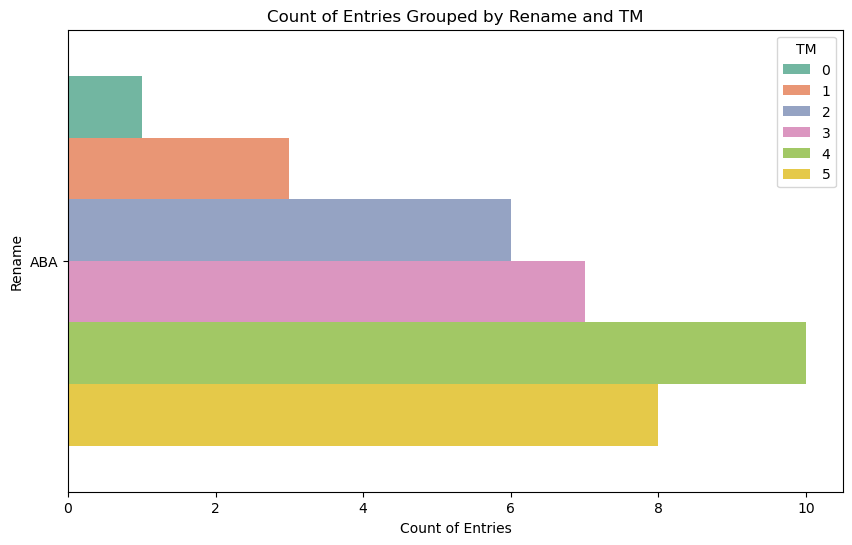

In [69]:
# Reset index to make 'Rename' and 'TM' regular columns
grouped1 = grouped1.reset_index()

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped1, y='Rename', x='Entry', hue='TM', palette='Set2', orient='h')

# Adding labels and title
plt.ylabel('Rename')
plt.xlabel('Count of Entries')
plt.title('Count of Entries Grouped by Rename and TM')
plt.legend(title='TM')

# Display the plot
plt.show()

In [41]:
phobius_no7tm = phobius[(phobius['TM'] < 6) | (phobius['TM'] > 8)]

In [42]:
# Read CSV files into DataFrames
df_amoeba = pd.read_csv("../../outputs/mining/redo1/tree_metadata/test02amoebatree_map_all.txt", sep=",")
df_chl = pd.read_csv("../../outputs/mining/redo1/tree_metadata/test01arch-chlorophytatree_map_all.txt", sep=",")
df_rho = pd.read_csv("../../outputs/mining/redo1/tree_metadata/test01arch-rhodophytatree_map_all.txt", sep=",")
df_pal = pd.read_csv("../../outputs/mining/redo1/tree_metadata/test01cryp-palpitomonastree_map_all.txt", sep=",")
df_fungi = pd.read_csv("../../outputs/mining/redo1/tree_metadata/test01fungitree_map_yeast_all.txt", sep=",")
df_hap = pd.read_csv("../../outputs/mining/redo1/tree_metadata/test01hap-haptophytatree_map_all.txt", sep=",")
df_metazoa1 = pd.read_csv("../../outputs/mining/redo1/tree_metadata/test02metazoatree_map_unreviewed.txt", sep=",")
df_metazoa2 = pd.read_csv("../../outputs/mining/redo1/tree_metadata/test02metazoatree_map_daphnia_all.txt", sep=",")
df_metazoa3 = pd.read_csv("../../outputs/mining/redo1/tree_metadata/test01metazoatree_map_reviewed.txt", sep=",")
df_plant = pd.read_csv("../../outputs/mining/redo1/tree_metadata/test01planttree_map_all.txt", sep=",")
df_salpt = pd.read_csv("../../outputs/mining/redo1/tree_metadata/test01sar-alveo-ptettree_map_all.txt", sep=",")
df_saltt = pd.read_csv("../../outputs/mining/redo1/tree_metadata/test01sar-alveo-tthetree_map_all.txt", sep=",")
df_sarh = pd.read_csv("../../outputs/mining/redo1/tree_metadata/test01sar-rhizariatree_map_all.txt", sep=",")
df_sstraes = pd.read_csv("../../outputs/mining/redo1/tree_metadata/test01sar-stra-esiltree_map_all.txt", sep=",")
df_sstrapt = pd.read_csv("../../outputs/mining/redo1/tree_metadata/test01sar-stra-ptritree_map_all.txt", sep=",")
df_allo = pd.read_csv("../../outputs/mining/redo1/tree_metadata/test01fungitree_map_allomyces_all.txt", sep=",")
#df_subset = pd.read_csv("../../outputs/mining/redo1/tree_metadata//test_subset.txt", sep=",")

# Concatenate all DataFrames
df = pd.concat([df_amoeba, df_chl, df_rho, df_pal, df_fungi, df_hap,
                df_metazoa1, df_metazoa2, df_metazoa3, df_plant,
                df_salpt, df_saltt, df_sarh, df_sstraes, df_sstrapt, df_allo])

In [43]:
no_7tm = pd.merge(phobius_no7tm, df,  left_on='Entry', right_on= 'Entry')

In [63]:
no_7tm[no_7tm['gpcr'] == 'fungi']

,TM,SP,Dataset,Entry,Entry Name_x,Entry Name_y,gpcr,color,taxa,taxa_color
50,0,0,sp,P10823,GPA2_YEAST,GPA2_YEAST,fungi,darkred,fungi,darkred
51,5,Y,sp,P06783,STE3_YEAST,STE3_YEAST,fungi,darkred,fungi,darkred


In [59]:
grouped_df = no_7tm[['TM', 'Dataset', 'gpcr','Entry']].groupby(['gpcr', 'TM']).count()

In [60]:
grouped_df

Dataset  Entry
gpcr  TM                
aba   4         2      2
      5         1      1
      9        12     12
      10        3      3
camp  9         1      1
friz  2         3      3
      3         1      1
      4         1      1
      5         1      1
      9         2      2
fungi 0         1      1
      5         1      1
itr   3         1      1
      4         1      1
      5         2      2
lung  1         3      3
      2         4      4
      3         2      2
      4         1      1
      5         2      2
      9         1      1
oa    0         1      1
      3         2      2
pf01  2        15     15
      3        25     25
      4        28     28
      5        44     44
      9         3      3
      10        1      1
      11        1      1
      12        1      1
      14        1      1
      17        1      1
pf02  1         1      1
      2         5      5
      3        11     11
      4         4      4
      5        11     11
pf03  2         5      5
      3         5      5
      4         6      6
      5         4      4

The Deep

In [43]:
#the deep
deep = pd.read_csv('../validation/deep_summary.txt', sep='\t')

In [44]:
deep

,Entry,Length,TMRs,Signal
0,Q9UP38,647,8,0
1,Q9ULV1,537,7,1
2,P91682,1036,7,1
3,O00270,319,7,0
4,Q96P68,337,7,0
...,...,...,...,...
65,O60242,1522,7,1
66,Q8IZP9,1017,7,1
67,Q96K78,797,8,0
68,Q7ZXS8,476,7,1


In [47]:
database = pd.merge(phobius_filtered, deep,  left_on='Entry', right_on= 'Entry', how='outer')

In [48]:
database

,TM,SP,Dataset,Entry,Entry Name,Length,TMRs,Signal
0,6,0,sp,E9QJ73,CXR32_DANRE,378.0,7.0,0.0
1,6,0,sp,O00270,GPR31_HUMAN,319.0,7.0,0.0
2,6,0,sp,O00421,CCRL2_HUMAN,344.0,7.0,0.0
3,6,0,sp,O14843,FFAR3_HUMAN,346.0,7.0,0.0
4,6,0,sp,O15529,GPR42_HUMAN,346.0,7.0,0.0
...,...,...,...,...,...,...,...,...
66,6,0,sp,Q9UHM6,OPN4_HUMAN,478.0,7.0,0.0
67,9,0,sp,Q9ULV1,FZD4_HUMAN,537.0,7.0,1.0
68,8,0,sp,Q9UP38,FZD1_HUMAN,647.0,8.0,0.0
69,8,0,sp,Q9VML9,TRISR_DROME,669.0,8.0,0.0
